In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
!pip install tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/sample_data/airbnb_data.csv')

**Data preparation**

In [3]:
data['room_type'] = data['room_type'].astype('category')
data['biz'] = data['biz'].astype('category')
data['multi'] = data['multi'].astype('category')
data['host_is_superhost'] = data['host_is_superhost'].astype('category')
data['guest_satisfaction_overall'] = data['guest_satisfaction_overall'].astype('category')

**Summary of rating groups**

In [4]:
data[data['guest_satisfaction_overall']==1].describe().to_csv('guest_aprasoma1')
data[data['guest_satisfaction_overall']==0].describe().to_csv('guest_aprasoma0')

**Data normalization**

In [5]:
numeric_cols = ['realSum', 'person_capacity', 'cleanliness_rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat']
df_numeric = data[numeric_cols]

In [6]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
df_scaled[['room_type', 'host_is_superhost', 'multi', 'biz', 'guest_satisfaction_overall']] = data[['room_type', 'host_is_superhost', 'multi', 'biz', 'guest_satisfaction_overall']]

**Train and test datasets**

In [15]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('guest_satisfaction_overall', axis=1)
y = df_scaled['guest_satisfaction_overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Decision Tree algorithm with default hyperparameters**

In [16]:

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7202572347266881


**GridSearchCV for optimal hyperparameters**

In [10]:
cls = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(cls, param_grid)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 9}
Best score: 0.8022574167638294


**Classifiers with Optimal Hyperparameters**

In [11]:
clf_best = DecisionTreeClassifier(max_depth=7, min_samples_split=9, min_samples_leaf=5, max_features='log2', criterion='log_loss', random_state=42)

**Quality Assessment Strategies**

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_best , X, y, cv=5)
print("5-cross validation results: {}".format(scores))
print("5-cross validation average: {:.2f}".format(scores.mean()))



clf_best.fit(X_train, y_train)
print("Holt-out method results:")
print("Classifier accuracy: {:.2f}".format(clf_best.score(X_test, y_test)))

5-cross validation results: [0.68167203 0.78778135 0.74919614 0.78456592 0.73633441]
5-cross validation average: 0.75
Holt-out method results:
Classifier accuracy: 0.73


In [18]:
y_pred_best = clf_best.predict(X_test)

**confussion matrix**

[[ 69  45]
 [ 40 157]]


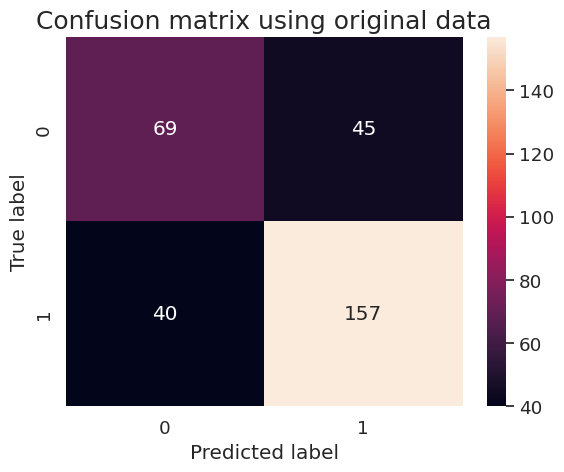

In [19]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_best)
print(CM)

# Visualize it as a heatmap
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(CM, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix using original data', fontsize=18)
plt.show()

**Classification Metrics**

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       114
           1       0.78      0.80      0.79       197

    accuracy                           0.73       311
   macro avg       0.71      0.70      0.70       311
weighted avg       0.72      0.73      0.73       311



**ROC Curve**

AUC: 0.7011087363077744


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

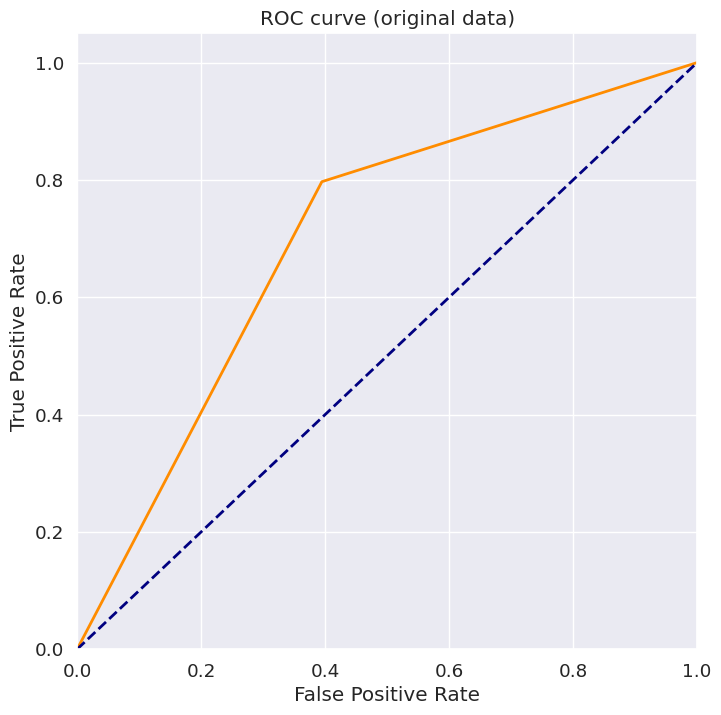

In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve (original data)")
plt.title

**Classification with Two-Dimensional Data**

In [22]:
X = df_scaled.drop('guest_satisfaction_overall', axis=1)
y = df_scaled['guest_satisfaction_overall']

**t-SNE algorithm for Reducing Data Dimensions to Two**

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, init='pca')
tsne_out = tsne.fit_transform(X)
tsne_df = pd.DataFrame(tsne_out, columns=['tSNE1', 'tSNE2'])

**Train-Test Split**

In [24]:
tsne_df_train, tsne_df_test, y_tsne_train, y_tsne_test = train_test_split(tsne_df, y, test_size=0.2, random_state=42)

**Decision Tree algorithm with default hyperparameters**

In [28]:

clf = DecisionTreeClassifier(random_state=42)

clf.fit(tsne_df_train, y_tsne_train)

y_pred = clf.predict(tsne_df_test)

accuracy = accuracy_score(y_tsne_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.64


**GridSearchCV for optimal hyperparameters**

In [29]:
cls = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(cls, param_grid)
grid_search.fit(tsne_df_train, y_tsne_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best score: 0.7331098587899987


In [30]:
clf_best2 = DecisionTreeClassifier(max_depth=10, min_samples_split=4, min_samples_leaf=1, max_features=None, criterion='gini', random_state=42)

clf_best2.fit(tsne_df_train, y_tsne_train)

y_tsne_pred = clf_best2.predict(tsne_df_test)

accuracy2 = accuracy_score(y_tsne_test, y_tsne_pred)
print('Accuracy: ', accuracy2)

Accuracy:  0.7106109324758842


**Quality Assessment Strategies**

In [35]:

scores2 = cross_val_score(clf_best2 , tsne_df, y, cv=5)
print("5-cross validation results: {}".format(scores2))
print("5-cross validation average: {:.2f}".format(scores2.mean()))


clf_best2.fit(tsne_df_train, y_tsne_train)
print("Holt-out method results:")
print("Classifier accuracy: {:.2f}".format(clf_best2.score(tsne_df_test, y_tsne_test)))

5-cross validation results: [0.72347267 0.71061093 0.72347267 0.67524116 0.62057878]
5-cross validation average: 0.69
Holt-out method results:
Classifier accuracy: 0.71


**confussion matrix**

[[ 74  40]
 [ 50 147]]


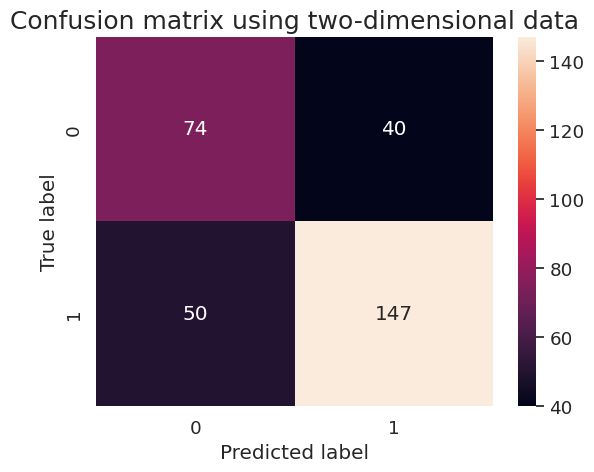

In [32]:
CM2 = confusion_matrix(y_tsne_test, y_tsne_pred)
print(CM2)

import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(CM2, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix using two-dimensional data', fontsize=18)
plt.show()

**Classification Metrics**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_tsne_test, y_tsne_pred))

              precision    recall  f1-score   support

           0       0.58      0.66      0.61       114
           1       0.78      0.72      0.75       197

    accuracy                           0.70       311
   macro avg       0.68      0.69      0.68       311
weighted avg       0.71      0.70      0.70       311



**ROC Curve and AUC**

AUC: 0.6976578502092795


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

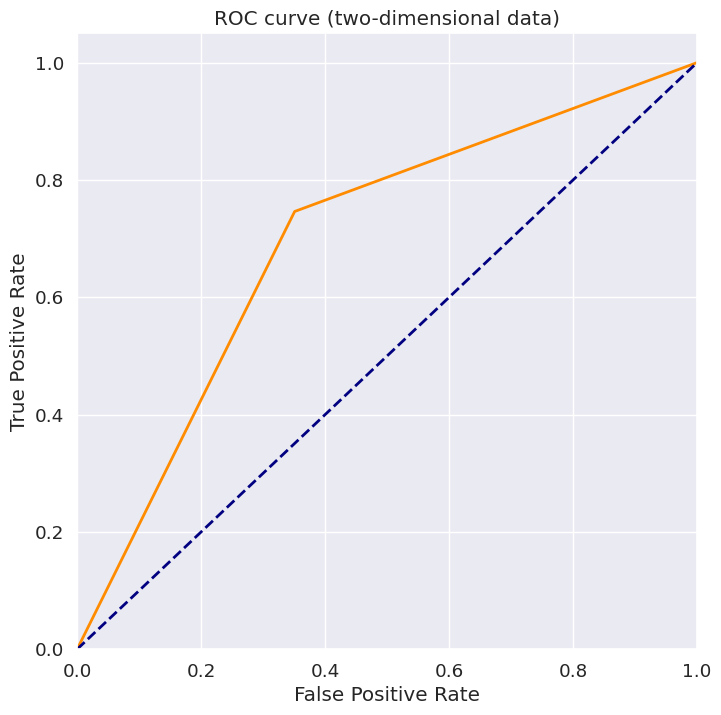

In [34]:
fpr, tpr, _ = roc_curve(y_tsne_test, y_tsne_pred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve (two-dimensional data)")
plt.title